In [ ]:
#Use diabetes.csv for the prediction using Logistic Regression. Split the dataset into training and test dataset in 80:20 ratio. Train the model on training dataset and use the test dataset for the prediction purpose.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [3]:
#Load Dataset
pima = pd.read_csv("C:/Users/Deep/Desktop/diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [5]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
print(X_test)

     pregnant  insulin   bmi  age  glucose  bp  pedigree
661         1        0  42.9   22      199  76     1.394
122         2      100  33.6   23      107  74     0.404
113         4        0  34.0   25       76  62     0.391
14          5      175  25.8   51      166  72     0.587
529         0        0  24.6   31      111  65     0.660
..        ...      ...   ...  ...      ...  ..       ...
366         6        0  27.6   29      124  72     0.368
301         2      135  31.6   25      144  58     0.422
382         1      182  25.4   21      109  60     0.947
140         3        0  21.1   55      128  78     0.268
463         5        0  27.6   37       88  78     0.258

[192 rows x 7 columns]


In [7]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

In [8]:
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

([<matplotlib.axis.YTick at 0x1fa2a333a88>,
 <a list of 2 Text yticklabel objects>)

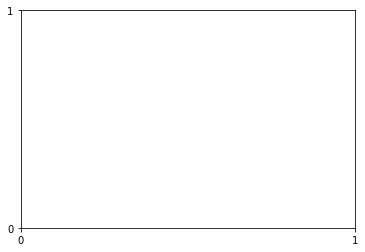

In [9]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

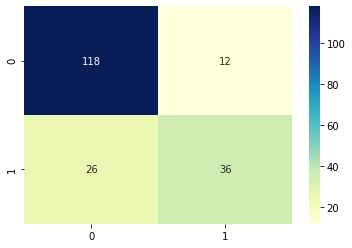

In [10]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

In [11]:
ax.xaxis.set_label_position("top")
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


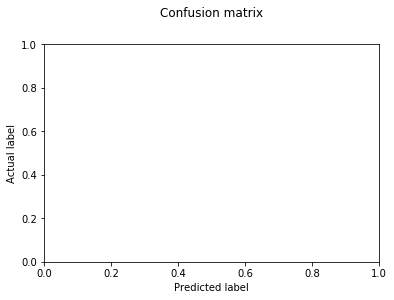

In [12]:
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

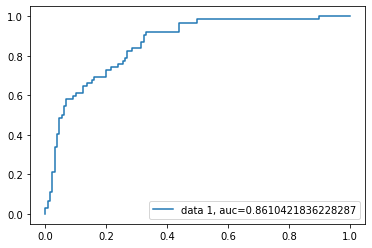

In [13]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()